In [16]:
import polars as pl
import statsmodels.api as sm


# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol'))).alias('return')
])

df = df.with_columns([
    ((pl.col('vwap') - pl.col('close'))).alias('vwap_close_diff')
])

df = df.with_columns([
    ((pl.col('vwap') + pl.col('close'))).alias('vwap_close_sum')
])

# 按日期和因子值排序并进行排名
df = df.with_columns([
    pl.col("vwap_close_diff").rank("dense").over("open_time").alias("rank_diff")
])

df = df.with_columns([
    pl.col("vwap_close_sum").rank("dense").over("open_time").alias("rank_sum")
])

df = df.with_columns([
    (pl.col('rank_diff') / pl.col('rank_sum')).alias('alpha042rank')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,vwap,return,vwap_close_diff,vwap_close_sum,rank_diff,rank_sum,alpha042rank
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64,f64,u32,u32,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",0.004438,null,-0.000093,0.008969,208,11,18.909091
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",0.004301,0.941735,0.000034,0.008568,126,11,11.454545
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",0.004073,0.970237,-0.000067,0.008213,115,11,10.454545
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",0.004352,1.048309,0.000012,0.008692,179,11,16.272727
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",0.004175,0.930645,0.000136,0.008214,105,11,9.545455
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",0.533531,1.080426,-0.023969,1.091031,60,104,0.576923
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",0.566082,1.037668,-0.012418,1.144582,67,102,0.656863
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",0.759743,1.383751,-0.040757,1.560243,30,118,0.254237


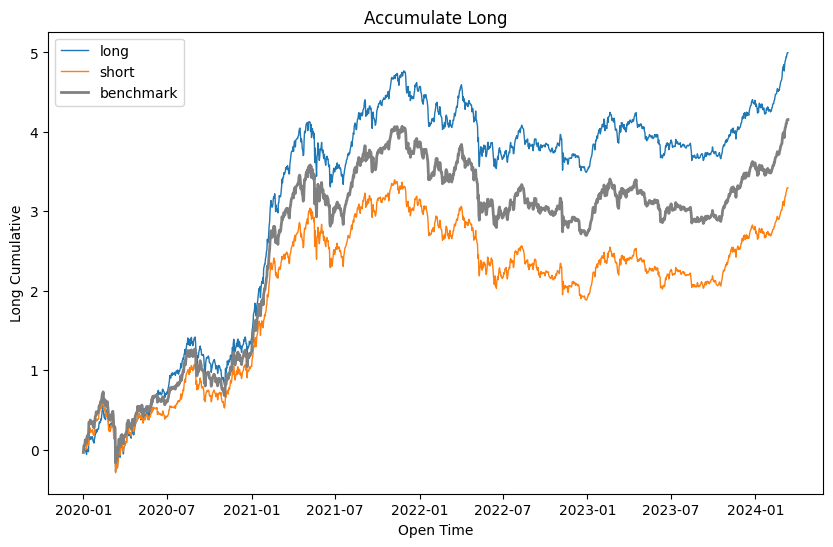

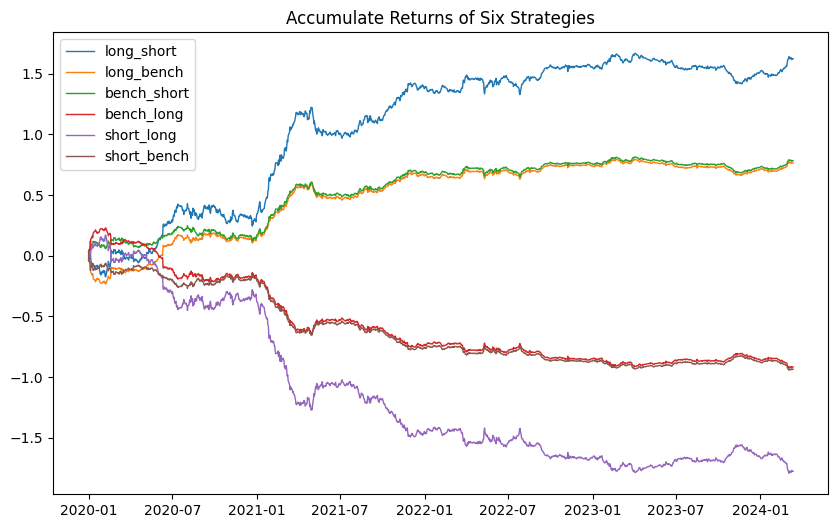

long: 
ann_return = 28.5472  sharpe = 5.9683  maxdd = 0.5364  calmar_ratio = 53.2174  

short: 
ann_return = 18.8376  sharpe = 4.2739  maxdd = 0.5572  calmar_ratio = 33.8053  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 9.2716  sharpe = 7.0245  maxdd = 0.1789  calmar_ratio = 51.8194  

long_bench: 
ann_return = 4.3644  sharpe = 5.792  maxdd = 0.2583  calmar_ratio = 16.8971  

bench_long: 
ann_return = -5.2404  sharpe = -6.9546  maxdd = 0.9388  calmar_ratio = -5.5819  

short_long: 
ann_return = -10.1476  sharpe = -7.6881  maxdd = 1.6765  calmar_ratio = -6.0529  

short_bench: 
ann_return = -5.3453  sharpe = -7.4801  maxdd = 0.945  calmar_ratio = -5.6563  

bench_short: 
ann_return = 4.4693  sharpe = 6.2542  maxdd = 0.1003  calmar_ratio = 44.539  



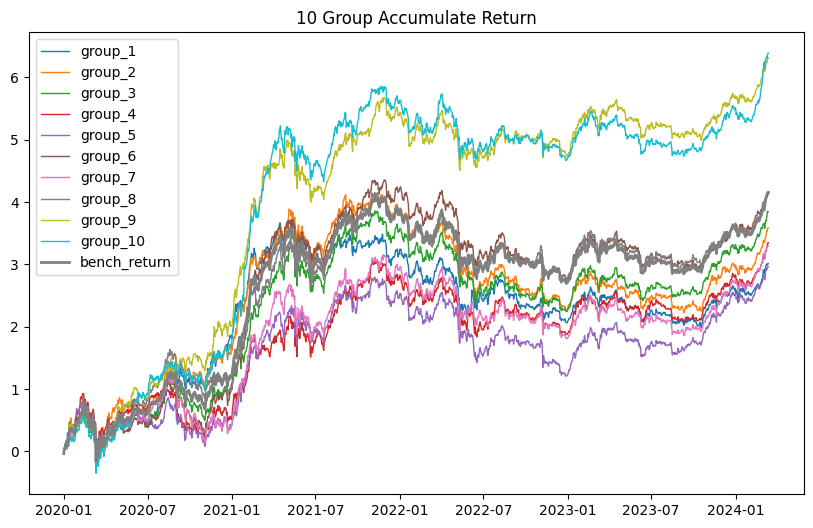

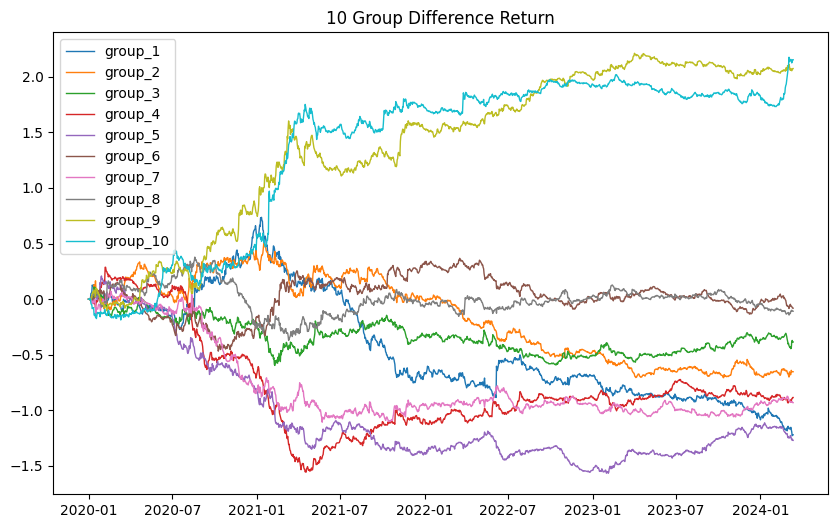

group_1: 
ann_return = 17.2138  sharpe = 3.7643  maxdd = 0.5548  calmar_ratio = 31.0251  

group_2: 
ann_return = 20.4529  sharpe = 4.3761  maxdd = 0.4653  calmar_ratio = 43.9602  

group_3: 
ann_return = 21.9779  sharpe = 4.763  maxdd = 0.5556  calmar_ratio = 39.5536  

group_4: 
ann_return = 19.1277  sharpe = 4.1256  maxdd = 0.4745  calmar_ratio = 40.3115  

group_5: 
ann_return = 16.9249  sharpe = 3.5945  maxdd = 0.4771  calmar_ratio = 35.4761  

group_6: 
ann_return = 23.7176  sharpe = 4.7814  maxdd = 0.4813  calmar_ratio = 49.2753  

group_7: 
ann_return = 18.863  sharpe = 3.8115  maxdd = 0.5042  calmar_ratio = 37.4127  

group_8: 
ann_return = 23.5604  sharpe = 4.7394  maxdd = 0.4771  calmar_ratio = 49.3815  

group_9: 
ann_return = 36.0319  sharpe = 7.2843  maxdd = 0.5199  calmar_ratio = 69.3033  

group_10: 
ann_return = 36.4874  sharpe = 7.0778  maxdd = 0.6016  calmar_ratio = 60.655  

-----------------------------------------
group_difference_1: 
ann_return = -6.969  sharpe =

In [17]:
factors = df.select(['open_time', 'symbol', 'alpha042rank'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()